#Find a dataset!

Average Time Spent By A User On Social Media(https://www.kaggle.com/datasets/imyjoshua/average-time-spent-by-a-user-on-social-media/data?fbclid=IwAR1da1-UrnLdL66fMut5LKwbAW0tZsZSkY_iE7co7ZBXippzfXmf4TdquJY)

In [ ]:
#link google drive to this colab and read data file
import pandas as pd
data = pd.read_csv("/content/dummy_data.csv", na_values="?")
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
df = pd.DataFrame(data)
data.head()

,age,gender,time_spent,platform,interests,location,demographics,profession,income,indebt,isHomeOwner,Owns_Car
0,56,male,3,Instagram,Sports,United Kingdom,Urban,Software Engineer,19774,True,False,False
1,46,female,2,Facebook,Travel,United Kingdom,Urban,Student,10564,True,True,True
2,32,male,8,Instagram,Sports,Australia,Sub_Urban,Marketer Manager,13258,False,False,False
3,60,non-binary,5,Instagram,Travel,United Kingdom,Urban,Student,12500,False,True,False
4,25,male,1,Instagram,Lifestlye,Australia,Urban,Software Engineer,14566,False,True,True


###*Summary for Numerical Categories: age, time_spent, income*

In [ ]:
#general data summary for numeric columns
data.describe()

,age,time_spent,income
count,1000.000000,1000.000000,1000.000000
mean,40.986000,5.029000,15014.823000
std,13.497852,2.537834,2958.628221
min,18.000000,1.000000,10012.000000
25%,29.000000,3.000000,12402.250000
50%,42.000000,5.000000,14904.500000
75%,52.000000,7.000000,17674.250000
max,64.000000,9.000000,19980.000000


###*Summary for Categorical Variables: gender, platform, interests, location, demographics,profession,indebt, isHomeOwner, Owns_Car*

In [ ]:
#summary for gender
data.gender.value_counts()

gender
male          337
non-binary    332
female        331
Name: count, dtype: int64

In [ ]:
#summary for platform
data.platform.value_counts()

platform
Instagram    363
YouTube      330
Facebook     307
Name: count, dtype: int64

In [ ]:
#summary for interests
data.interests.value_counts()

interests
Lifestlye    341
Sports       331
Travel       328
Name: count, dtype: int64

In [ ]:
#summary for location
data.location.value_counts()

location
Australia         352
United Kingdom    329
United States     319
Name: count, dtype: int64

In [ ]:
#summary for demographics
data.demographics.value_counts()

demographics
Rural        340
Sub_Urban    335
Urban        325
Name: count, dtype: int64

In [ ]:
#summary for profession
data.profession.value_counts()

profession
Marketer Manager     355
Software Engineer    336
Student              309
Name: count, dtype: int64

In [ ]:
#summary for indebt
data.indebt.value_counts()

indebt
False    503
True     497
Name: count, dtype: int64

In [ ]:
#summary for isHomeOwner
data.isHomeOwner.value_counts()

isHomeOwner
True     508
False    492
Name: count, dtype: int64

In [ ]:
#summary for Owns_Car
data.Owns_Car.value_counts()

Owns_Car
True     539
False    461
Name: count, dtype: int64

In [ ]:

def categorize(x):
  if (18 <= x <= 24):
    return 'Young Adult(18-24)'
  elif (25<= x <= 39):
    return "Adults(25-39)"
  elif (40 <= x <= 54):
    return "Middle-Aged Adults(40-54)"
  else:
    return 'Mature Adults(55-65)'

df['age_category'] = df['age'].map(categorize)

df['profession'] = df['profession'].replace('Marketer Manager', 'Marketing Manager')
df['interests'] = df['interests'].replace('Lifestlye', 'Lifestyle')


df.head()


,age,gender,time_spent,platform,interests,location,demographics,profession,income,indebt,isHomeOwner,Owns_Car,age_category
0,56,male,3,Instagram,Sports,United Kingdom,Urban,Software Engineer,19774,True,False,False,Mature Adults(55-65)
1,46,female,2,Facebook,Travel,United Kingdom,Urban,Student,10564,True,True,True,Middle-Aged Adults(40-54)
2,32,male,8,Instagram,Sports,Australia,Sub_Urban,Marketing Manager,13258,False,False,False,Adults(25-39)
3,60,non-binary,5,Instagram,Travel,United Kingdom,Urban,Student,12500,False,True,False,Mature Adults(55-65)
4,25,male,1,Instagram,Lifestyle,Australia,Urban,Software Engineer,14566,False,True,True,Adults(25-39)


#15 Questions & EDA+Answers


#1. Does age affect the time spent by a user on social media, any correlations with younger audiences?
  - WHY WE CARE: Answering this question could give us more insight into how possibly younger generations are affected by spending more time on social media and could play a role in other research questions related social media and age.

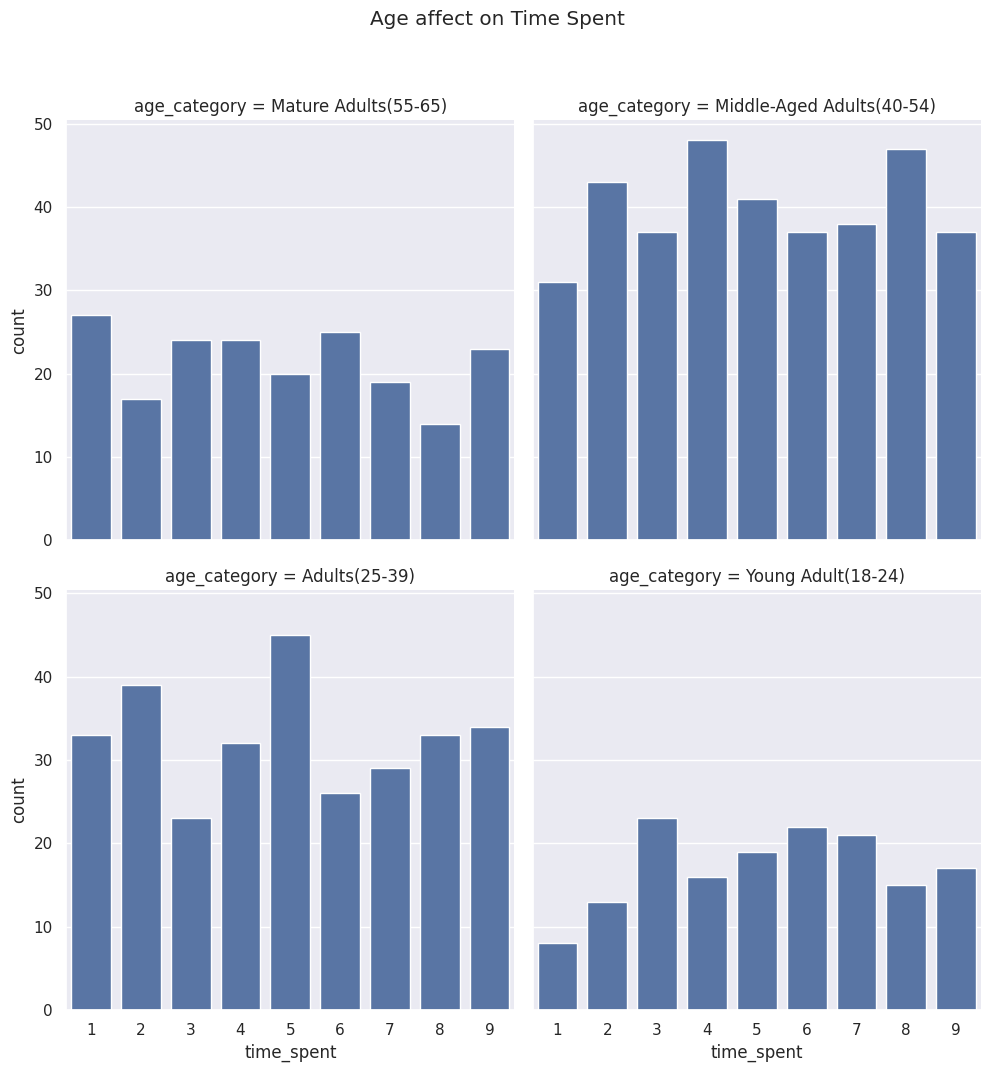

In [ ]:
sns.catplot(
    x='time_spent',
    data=df,
    kind='count',
    col='age_category',
    col_wrap=2
)
plt.suptitle("Age affect on Time Spent",y=1.07);

ANSWER: Based on the graph it can be seen that the young adult group actually does not spend nearly as much time on social media as the other age groups. Middle aged adults spend the most time on social media which can have to do with the fact they work in spaces that reuqire them to utilize these applications more heavily or because they have more free time compared to the other age groups.

#2. Does ones professional status affect how much time they spend on social media?
 - WHY WE CARE: Answering this question could show how certain professions require more time on social media compared to others which can be an important piece of information for people seeking to join the workforce.

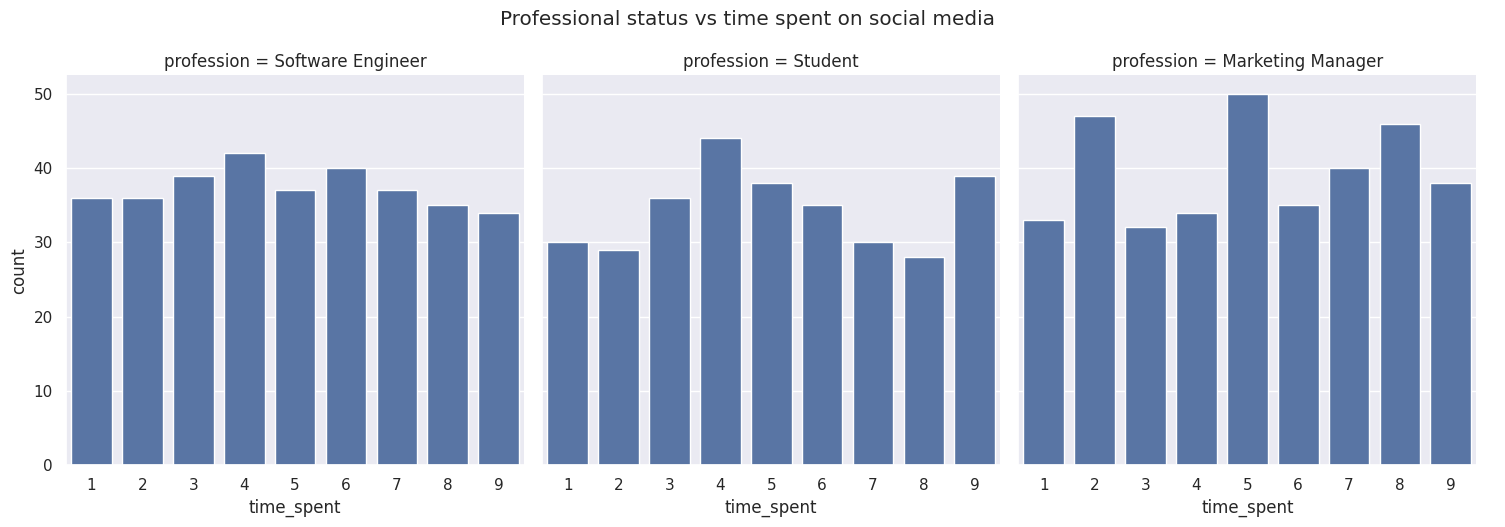

In [ ]:
sns.catplot(
    x='time_spent',
    data=df,
    kind='count',
    col='profession'
)
plt.suptitle("Professional status vs time spent on social media",y=1.05);

ANSWER: Based on the graph it can be seen in the Marketing Manager profession the time spent on social media is much higher than Student and Software Engineer. This is most likely due to the nature of the job reuqiring them to understand trends within social media platforms and incorporating them into marketing.

#3. What is the median age of users for each platform?

  - WHY WE CARE: Ths way we can see the median age for each platform and see the popularity of which applications for certain age groups.

In [ ]:
df.groupby('platform')['age'].median().to_frame().astype(int)

,age
platform,
Facebook,41
Instagram,42
YouTube,42


ANSWER: Generally the age of users is usually around early 40s, 41 to 42 across the three social media platforms this dataset looks at. This could also show the possible biases present within the data set itself.

#4. Does demographic play a role in the time spent on social media?



  - WHY WE CARE: Answering this question could promote social media platforms to push forward content from demographics that bring them more content production. For example, if urban areas have a much higher time spent on social media then pushing content to them would help the application.

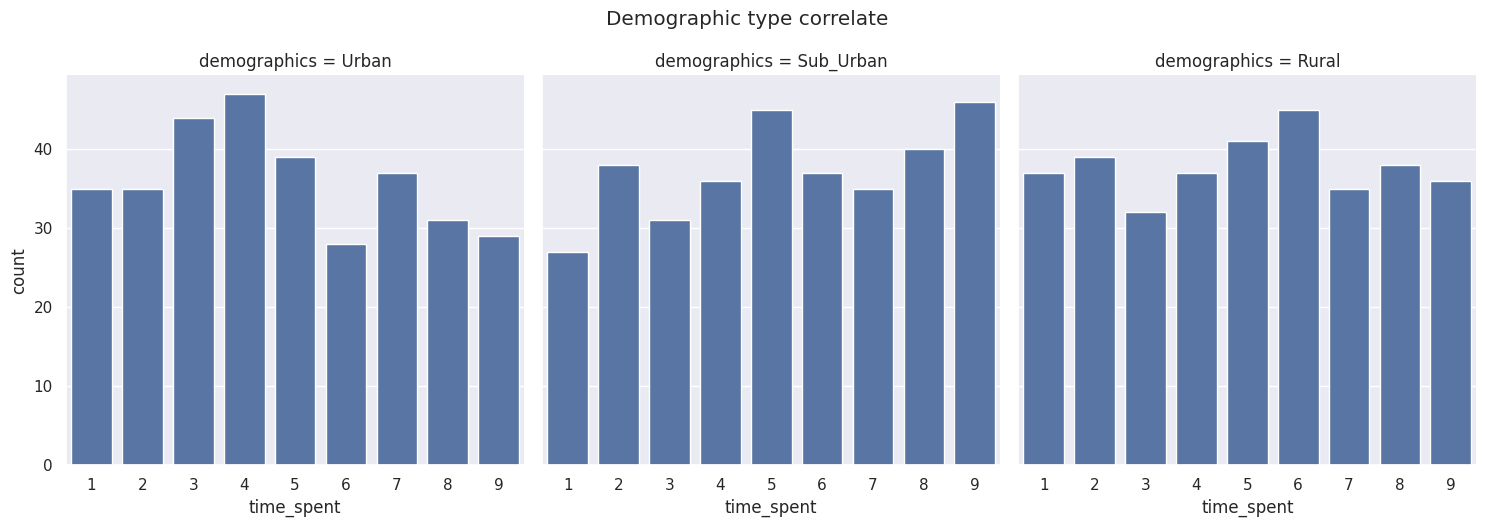

In [ ]:
sns.catplot(
    x='time_spent',
    data=df,
    kind='count',
    col='demographics'
)
plt.suptitle("Demographic type correlate",y=1.05);

ANSWER: Different demographics resulted in a fairly even spread across the three analyzed areas with Urban having a slight right skew, suburban having a generally normal distribution, and rural having also a generally normal distribution.

#5. Does someone owning a car affect how much time they spent on social media?


  - WHY WE CARE: Answering this question could give us insight into how influence of lifestyle choices and access to transportation affects peoples time on spent on social media.


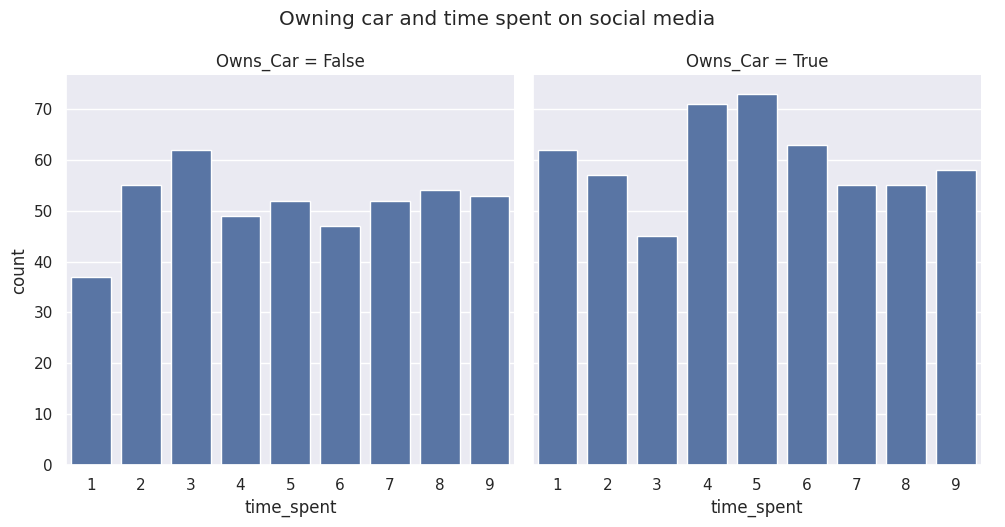

In [ ]:
sns.catplot(
    x='time_spent',
    data=df,
    kind='count',
    col='Owns_Car'
)
plt.suptitle("Owning car and time spent on social media",y=1.05);

ANSWER: Based on the graphs it seems people who don't own cars spend various amounts of time on social media and overall has a uniform distribution. People who do own cars tend to spend around majority of 4-5 hours of time on social media which is about a generally normal distribution. This could indicate people who do own cars tend to spend about half of their days on social media because they have more time to do so without having to worry about public transportation.

#6. Do  individuals using certain social media have higher incomes?
- WHY WE CARE: By answering this question, we would better understand how income impacts a person's prefered social media. It would help us interpret how money plays a role in which social media platform a user chooses.


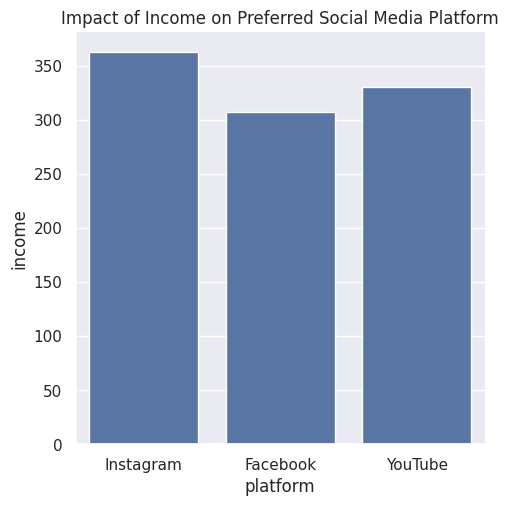

In [ ]:
sns.catplot(
    x='platform',
    data=df,
    kind='count'
).set_axis_labels('platform', 'income');
plt.title("Impact of Income on Preferred Social Media Platform");

ANSWER: The graph shows that, in order of highest to lowest incomes, users are more likely to use Instagram, YouTube, and Facebook. This result can be used to understand why certain social medias appeal to certain income range populations.

#7. What is the average income per total time spent?

- WHY WE CARE: This statistic will give us insights into the kind of pattern between total time spent and income.



In [ ]:
pd.DataFrame(df.groupby(by='time_spent')['income'].mean()).style.background_gradient(cmap='Greens')

,income
time_spent,
1,14336.363636
2,15204.767857
3,15617.420561
4,15509.408333
5,14223.024000
6,15081.318182
7,15096.570093
8,15249.522936
9,14829.207207


ANSWER: There is an uniform distrubution between the time spent and the average income.

#8. How does the user's age impact which social media platform they use?

- WHY WE CARE: Different social media platforms cater to different age groups, so this question can help us learn how exactly users are distributed across different platforms based on their age. If social media platforms want to diversify the age range of users using their platform, they could use the answer to this question in order to figure out which age groups they should be focusing on gaining as new users.


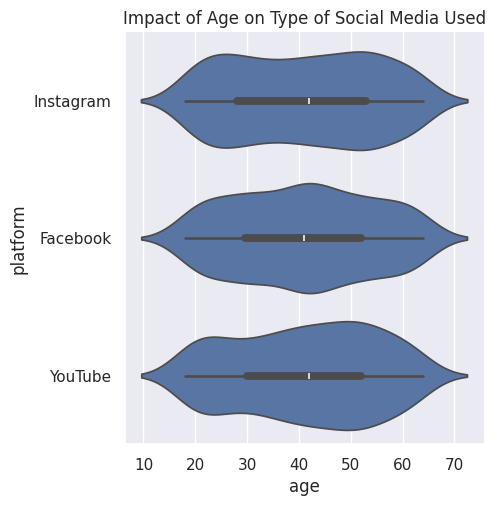

In [ ]:
sns.catplot(
    data=df,
    x="age",
    y="platform",
    kind="violin"
    )

plt.title("Impact of Age on Type of Social Media Used");


ANSWER: This violin plot shows the median in the middle of the graph. For Instagram, the majority of users are younger and older populations, while Facebook predominantly has middle-aged users, and YouTube mainly has older users.

#9. How do users' gender impact the social media platform they use and how long they spend on social media?

- WHY WE CARE: This question helps answer how gender influences which platform they tend to use and higher time spent on social media. This question could help prompt research into why a certain gender may spend more time on social media than the other, and why they prefer certain platforms over others.


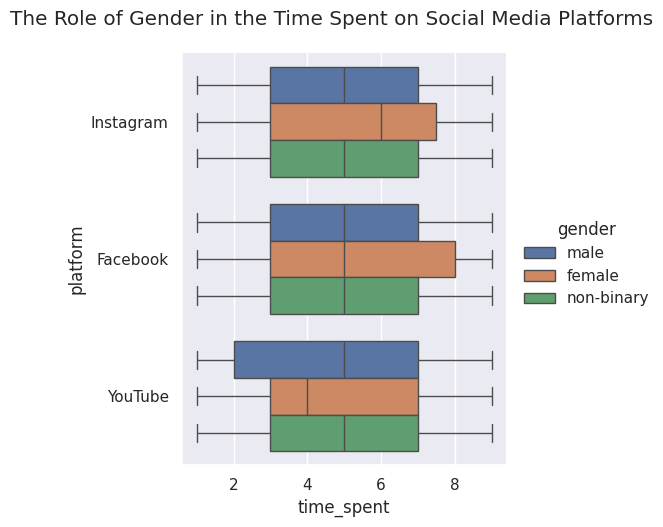

In [ ]:
g=sns.catplot(
    data=df,
    x="time_spent",
    y="platform",
    kind="box",
    hue="gender",
    #col="gender"
)
g.fig.suptitle("The Role of Gender in the Time Spent on Social Media Platforms", y=1.05);

ANSWER: This graph shows the time range and median time spemt by each gender on social media. For Instagram, males and non-binary have the same time range and median time spent, while females have a greater time range and a higher median. For Facebook, all genders have the same median time but females spend more time on social media. On YouTube, males spend less time on social media but have the same median as non-binary people, while females spend the same amount of time of social media as non-binary but have a lower median.

#10. Does location play a role in the time spent on social media?

- WHY WE CARE: This question will show how different locations UK, Australia, and the U.S.  spend their time and this could show what regions tend to use certain applications more.

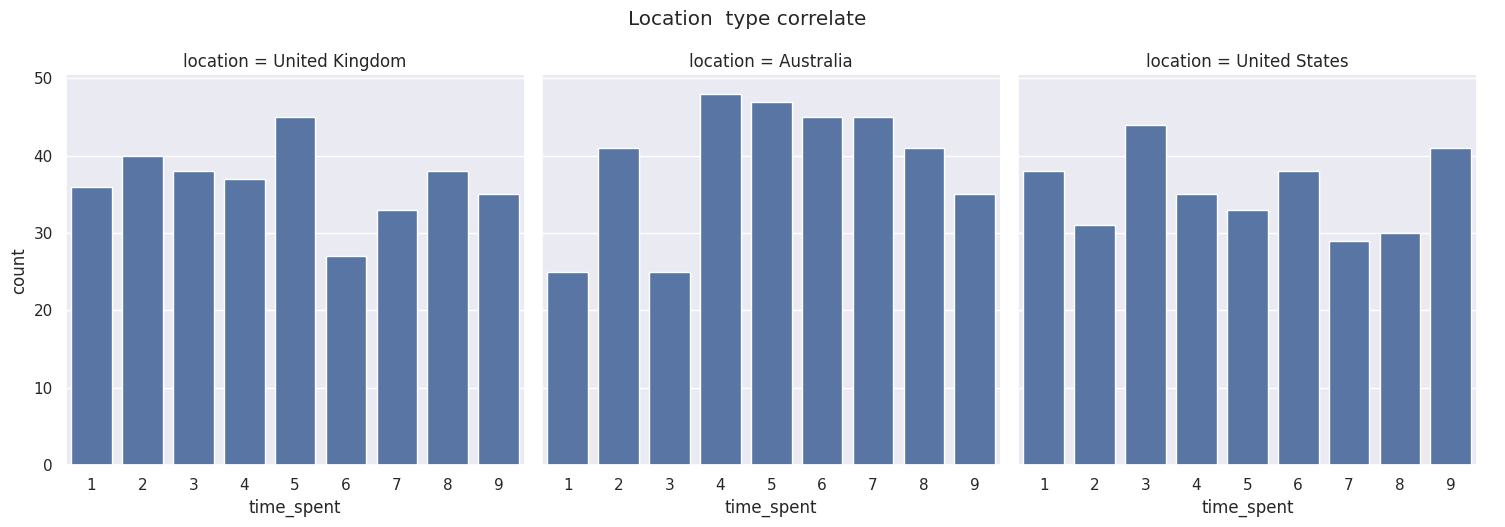

In [ ]:
sns.catplot(
    x='time_spent',
    data=df,
    kind='count',
    col='location'
)
plt.suptitle("Location  type correlate",y=1.05);

ANSWER: This graph shows how the three different regions the U.K., Austalia, and United States spend time on social media. As shown with the graph Australia shows their population tends to ulitize social media more than the U.K. and U.S.

#11. How does the user's primary area of interest impact the time spent on social media?
  - WHY WE CARE: Find the interests that result in higher engagement on social media can inform content creators and marketers about trending topics. This understanding could help produce content that resonates more effectively with the audience, potentially increasing user satisfaction and platform loyalty.

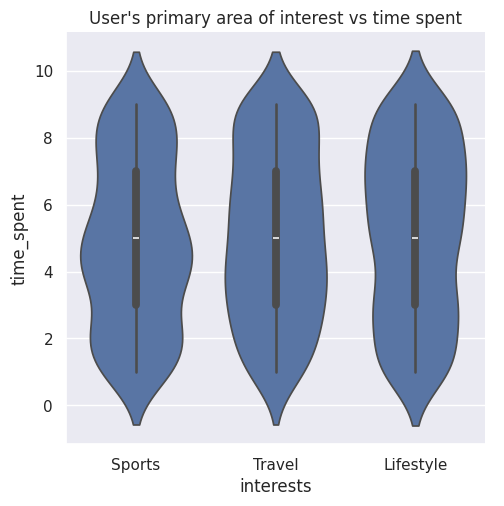

In [ ]:
#11: How does the user's primary area of interest impact the time spent on social media?

sns.catplot(
    data=df,
    x="interests",
    y="time_spent",
    kind="violin"
    )
plt.title("User's primary area of interest vs time spent");

ANSWER:
- The plots have similar distribution with wide bases and narrower peaks, which indicate a common pattern of variability with a clustering around the median time spent.
- The median average time spent is similar across all three interests, which suggest that the user's primary area of interest does not significantly impact the time a user spent on social media.

Conclusion: The primary area of interest of a user does not significantly impact the average time they spent on social media. All three categories show similar engagement levels in terms of median time and distribution

#12. Is there a pattern of social media platform preference among different professional groups?
  - WHY WE CARE: Understanding how certain professions attract towards specific platforms could be useful in targeted job advertising and professional networking opportunities.

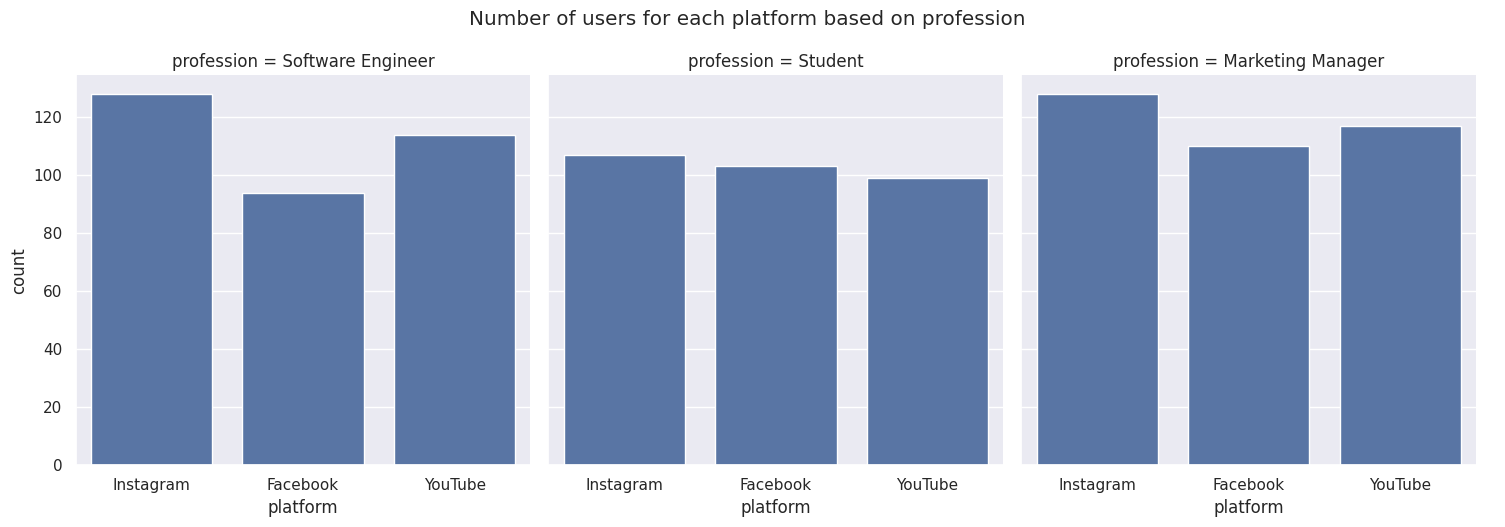

In [ ]:
#12: Is there a pattern of social media platform preference among different professional groups?

sns.catplot(
    x='platform',
    data=df,
    kind='count',
    col='profession'
)
plt.suptitle("Number of users for each platform based on profession", y = 1.05);


ANSWER:
- Software Engineer: The first graph suggests that software engineers have a preference for Instagram over YouTube and Facebook.
- Student: The count of Student users across the three platforms are quite close to each other, which suggest that there might not be a preference for any specific social media platform.
- Marketing Manager: Although the count of users who are marketing manager is closely distributed across all three platforms, the graph suggest that marketing managers prefer Instagram slightly more.

# 13. What is the average time_spent per platform of social media?
  - WHY WE CARE: This will help us understand the pattern between the time spent each social media platforms.

In [ ]:
pd.DataFrame(df.groupby(by="platform")['time_spent'].mean()).style.background_gradient(cmap='Blues')

,time_spent
platform,
Facebook,5.055375
Instagram,5.151515
YouTube,4.869697


ANSWER: Here we can notice that Facebook and Instagram have a higher average time_spent.

#14. How does a user's profession influence their primary area of interest on social media?
  - WHY WE CARE: By understanding how different professions have different interests, social media platforms and content creators can adjust their content strategies to better engage users. Additionally, this insight could inform targeted advertising and career-related content, making social media interactions more relevant and valuable for users across various professional fields.

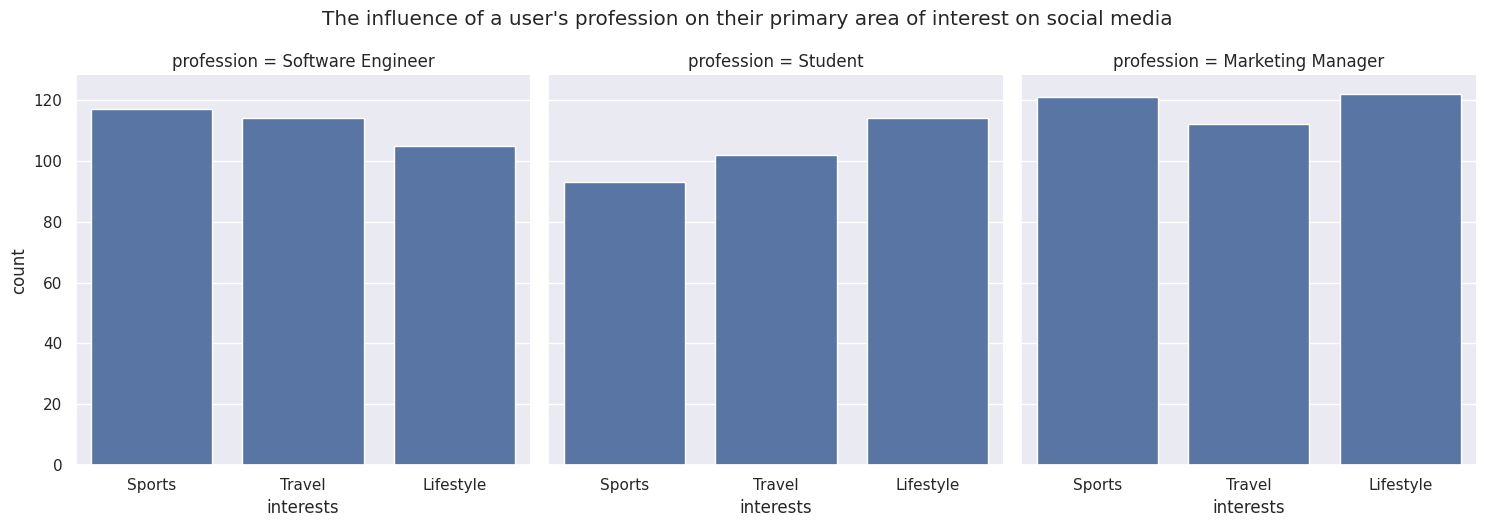

In [ ]:
#14: How does a user's profession influence their primary area of interest on social media?

sns.catplot(
    x='interests',
    data=df,
    kind='count',
    col='profession'
)
plt.suptitle("The influence of a user's profession on their primary area of interest on social media", y=1.05);

ANSWER: Here we can notice that Software engineers are more interested in Sports, whereas Students are more invested in Lifestyle. Marketing Managers are interested in both Sports and Lifestyle.



#15. How is the primary area of interest distributed across different age categories on social media?
  - WHY WE CARE: Understanding the distribution of interests across age categories can offer invaluable insights for content creators, advertisers, and platform developers into the varying content consumption patterns. Creating content that align with the interest of each age category can enhance user satisfaction and engagement.

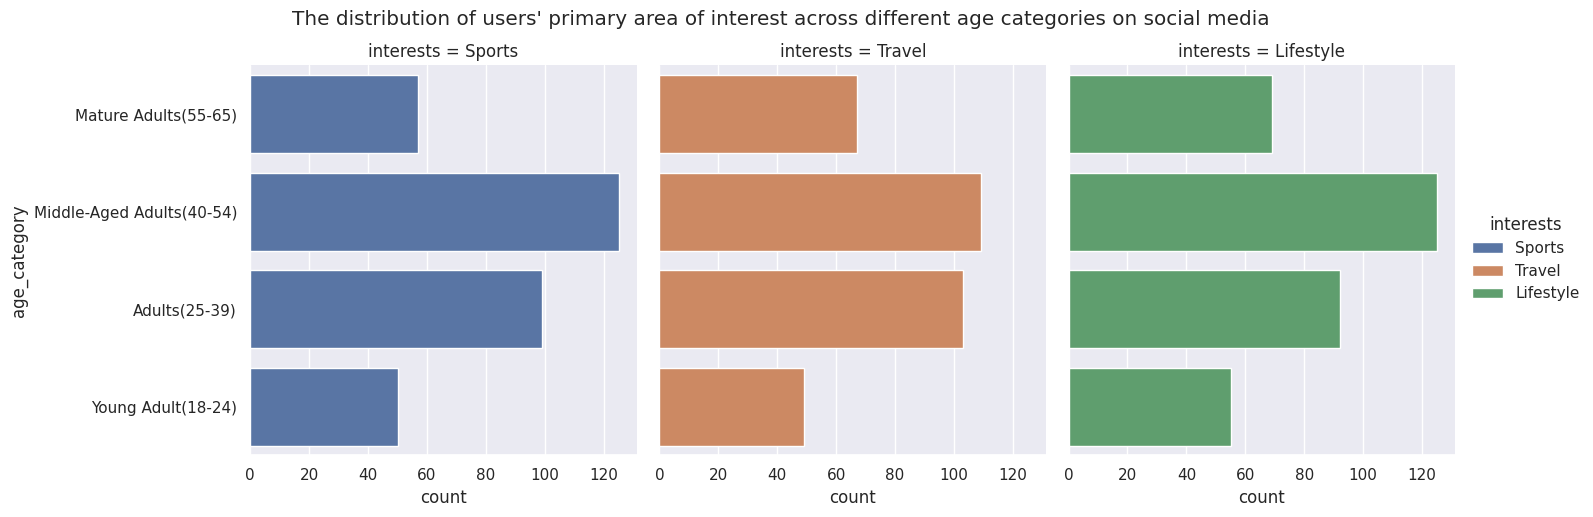

In [ ]:
#15: How is the primary area of interest distributed across different age categories on social media?

sns.catplot(
    y='age_category',
    data=df,
    kind='count',
    col='interests',
    hue='interests'
)
plt.suptitle("The distribution of users' primary area of interest across different age categories on social media", y=1.03);

ANSWER: The distribution of each of the interest categories is the same across all plots. The most popular age_category for all interests is Middle Aged Adults possibly because they are more affulent and have more leisure time.

# Adding noise and correlation

In [ ]:
time_spent = df['time_spent'].values
income = df['income'].values

y = -(15014.823 * time_spent) + (income.mean() * 9)

noise_1 = np.random.normal(0, 0.33, len(time_spent))
noise_2 = np.random.normal(0, 15_000, len(time_spent))

time_spent_noised = time_spent + noise_1
# x_noised = time_spent

income_noised = np.abs(y + noise_2)

In [ ]:
def add_age_correlation(row) :
  if row.time_spent < 2.5:
    row.age = np.random.randint(50, 66, 1)
  elif row.time_spent < 3.5:
    row.age = np.random.randint(35, 50, 1)
  elif row.time_spent < 6:
    row.age = np.random.randint(20, 35, 1)
  else:
    row.age = np.random.randint(18, 20, 1)
  return row

df = df.apply(add_age_correlation, axis=1)

In [ ]:
def categorize(x):
  if (18 <= x <= 24):
    return 'Young Adult(18-24)'
  elif (25<= x <= 39):
    return "Adults(25-39)"
  elif (40 <= x <= 54):
    return "Middle-Aged Adults(40-54)"
  else:
    return 'Mature Adults(55-65)'

df['age_category'] = df['age'].map(categorize)

df['profession'] = df['profession'].replace('Marketer Manager', 'Marketing Manager')
df['interests'] = df['interests'].replace('Lifestlye', 'Lifestyle')


df.head()

,age,gender,time_spent,platform,interests,location,demographics,profession,income,indebt,isHomeOwner,Owns_Car,age_category
0,45,male,3,Instagram,Sports,United Kingdom,Urban,Software Engineer,19774,True,False,False,Middle-Aged Adults(40-54)
1,53,female,2,Facebook,Travel,United Kingdom,Urban,Student,10564,True,True,True,Middle-Aged Adults(40-54)
2,18,male,8,Instagram,Sports,Australia,Sub_Urban,Marketing Manager,13258,False,False,False,Young Adult(18-24)
3,30,non-binary,5,Instagram,Travel,United Kingdom,Urban,Student,12500,False,True,False,Adults(25-39)
4,63,male,1,Instagram,Lifestyle,Australia,Urban,Software Engineer,14566,False,True,True,Mature Adults(55-65)


In [ ]:
pd.DataFrame(df.groupby('age_category')['time_spent'].mean()).style.background_gradient(cmap='bwr')

,time_spent
age_category,
Adults(25-39),4.228473
Mature Adults(55-65),1.488688
Middle-Aged Adults(40-54),2.319265
Young Adult(18-24),7.022346


In [ ]:
demos = df.demographics.unique().tolist()

def add_demograhpics_correlation(row) :
  if row.time_spent < 3:
    # either Rural or Sub_Urban
    index = np.random.randint(1, 3, 1)[0]
    row.demographics = demos[index]

  # either Urban or Sub_Urban
  elif row.time_spent < 6:
    index = np.random.randint(0, 2, 1)[0]
    row.demographics = demos[index]

  # Urban
  else:
    row.demographics = demos[0]

  return row

df = df.apply(add_demograhpics_correlation, axis=1)
df.head()

,age,gender,time_spent,platform,interests,location,demographics,profession,income,indebt,isHomeOwner,Owns_Car,age_category
0,45,male,3,Instagram,Sports,United Kingdom,Sub_Urban,Software Engineer,19774,True,False,False,Middle-Aged Adults(40-54)
1,53,female,2,Facebook,Travel,United Kingdom,Rural,Student,10564,True,True,True,Middle-Aged Adults(40-54)
2,18,male,8,Instagram,Sports,Australia,Urban,Marketing Manager,13258,False,False,False,Young Adult(18-24)
3,30,non-binary,5,Instagram,Travel,United Kingdom,Urban,Student,12500,False,True,False,Adults(25-39)
4,63,male,1,Instagram,Lifestyle,Australia,Rural,Software Engineer,14566,False,True,True,Mature Adults(55-65)


In [ ]:
pd.DataFrame(df.groupby('demographics')['time_spent'].mean()).style.background_gradient(cmap='bwr')

,time_spent
demographics,
Rural,1.527778
Sub_Urban,3.119048
Urban,6.600334


In [ ]:
profs = ['Software Engineer', 'Marketing Manager']

def add_profession_correlation(row):

  # Student
  if row.income < 75_000:
    row.profession = 'Student'

  # either SWE or Marketing Manager
  if row.income > 60_000 and row.income < 120_000:
    index = np.random.randint(0, 2, 1)[0]
    row.profession = profs[index]

    # Software Engineer
  if row.income > 120_000:
    row.profession = profs[0]
  return row

df = df.apply(add_profession_correlation, axis=1)
df.head()

,age,gender,time_spent,platform,interests,location,demographics,profession,income,indebt,isHomeOwner,Owns_Car,age_category
0,45,male,3,Instagram,Sports,United Kingdom,Sub_Urban,Student,19774,True,False,False,Middle-Aged Adults(40-54)
1,53,female,2,Facebook,Travel,United Kingdom,Rural,Student,10564,True,True,True,Middle-Aged Adults(40-54)
2,18,male,8,Instagram,Sports,Australia,Urban,Student,13258,False,False,False,Young Adult(18-24)
3,30,non-binary,5,Instagram,Travel,United Kingdom,Urban,Student,12500,False,True,False,Adults(25-39)
4,63,male,1,Instagram,Lifestyle,Australia,Rural,Student,14566,False,True,True,Mature Adults(55-65)


In [ ]:
pd.DataFrame(df.groupby('profession')['income'].mean()).style.background_gradient(cmap='bwr')

,income
profession,
Student,15014.823000


In [ ]:
def add_indebt_correlation(row):
  if row.profession == "Student":
      row.indebt = True

  if row.profession == "Software Engineer" and row.isHomeOwner == True and row.Owns_Car == True:
    row.indebt = True

  if row.profession == "Marketing Manager" and (row.isHomeOwner == True or row.Owns_Car == True):
    row.indebt = True

  return row

df = df.apply(add_indebt_correlation, axis=1)
df.head()

,age,gender,time_spent,platform,interests,location,demographics,profession,income,indebt,isHomeOwner,Owns_Car,age_category
0,45,male,3,Instagram,Sports,United Kingdom,Sub_Urban,Student,19774,True,False,False,Middle-Aged Adults(40-54)
1,53,female,2,Facebook,Travel,United Kingdom,Rural,Student,10564,True,True,True,Middle-Aged Adults(40-54)
2,18,male,8,Instagram,Sports,Australia,Urban,Student,13258,True,False,False,Young Adult(18-24)
3,30,non-binary,5,Instagram,Travel,United Kingdom,Urban,Student,12500,True,True,False,Adults(25-39)
4,63,male,1,Instagram,Lifestyle,Australia,Rural,Student,14566,True,True,True,Mature Adults(55-65)


In [ ]:
df[['profession', 'indebt']].value_counts()

profession  indebt
Student     True      1000
Name: count, dtype: int64

In [ ]:
df[['time_spent', 'age', 'income']].corr().style.background_gradient(cmap='bwr')

,time_spent,age,income
time_spent,1.000000,-0.881549,0.004757
age,-0.881549,1.000000,-0.005729
income,0.004757,-0.005729,1.000000


Text(0.5, 1.0, 'time_spent vs. income')

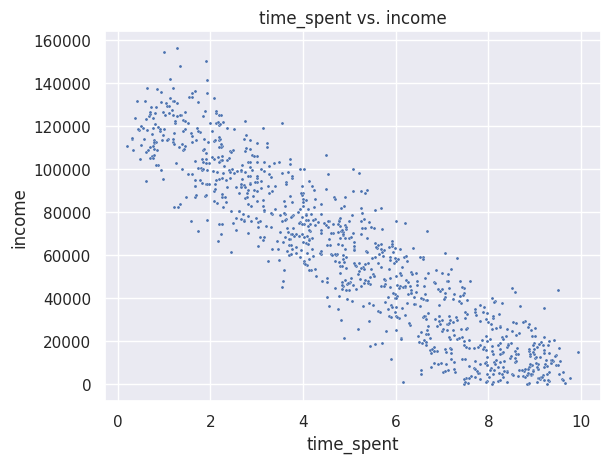

In [ ]:
df['time_spent'] = pd.Series(time_spent_noised)
df['income'] = pd.Series(income_noised)
sns.scatterplot(
    data=df,
    x='time_spent',
    y='income',
    s=5
)
plt.title("time_spent vs. income")

Text(0.5, 1.0, 'age vs. income')

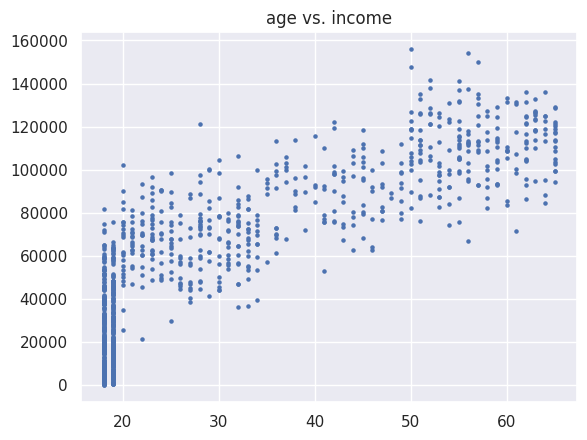

In [ ]:
plt.scatter(
    df['age'], df['income'], s=5
)

plt.title("age vs. income")

Text(0.5, 1.0, 'age vs. time spent')

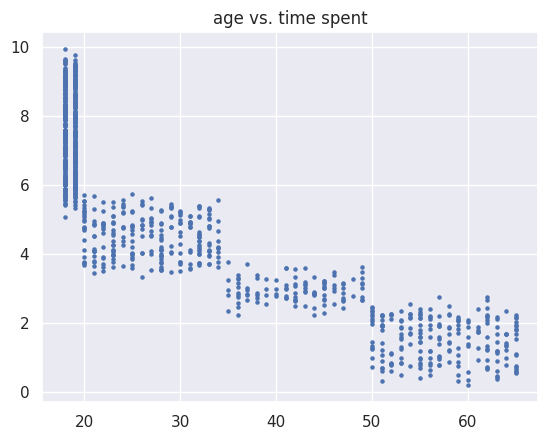

In [ ]:

plt.scatter(
    df['age'], df['time_spent'], s=5
)
plt.title("age vs. time spent")

## Predicting `income` based on `age,	time_spent,	demographics,	profession,	indebt,	age_category`

# Machine Learning

In [ ]:
from sklearn.preprocessing import QuantileTransformer, OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from scipy.stats import randint

In [ ]:
# features
features = df.columns.tolist()

X = df.copy().drop(columns=['gender', "platform", "isHomeOwner", "Owns_Car", "income", 'location', 'interests'])
y = df.copy()['income']
X.head()

,age,time_spent,demographics,profession,indebt,age_category
0,45,3.230508,Sub_Urban,Student,True,Middle-Aged Adults(40-54)
1,53,1.674874,Rural,Student,True,Middle-Aged Adults(40-54)
2,18,8.505647,Urban,Student,True,Young Adult(18-24)
3,30,4.998262,Urban,Student,True,Adults(25-39)
4,63,1.130768,Rural,Student,True,Mature Adults(55-65)


In [ ]:
categorical = ["profession", "age_category", "indebt", "demographics", ]

column_transformer = ColumnTransformer(
    [('cat', OneHotEncoder(), categorical)],
    remainder='passthrough'
)

X = column_transformer.fit_transform(X)

In [ ]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
ml_models = [
    ("K Nearest Neighbors", KNeighborsRegressor()),
    ("Linear Regression", LinearRegression()),
    ("Random Forest", RandomForestRegressor())
]

In [ ]:
fit_models = list()

for name, model in ml_models:
  model.fit(X_tr, y_tr)

  fit_models.append((name, model))

  c_scores = cross_val_score(model, X_tr, y_tr, scoring="neg_mean_squared_error", cv=5)

  scores = np.sqrt(-c_scores)

  print(f'{name} Mean RMSE: {scores.mean():.2f}, Std: {scores.std():.2f}')

K Nearest Neighbors Mean RMSE: 15566.92, Std: 887.66
Linear Regression Mean RMSE: 14215.98, Std: 605.71
Random Forest Mean RMSE: 16124.63, Std: 1102.31


In [ ]:
grid_searches = [
    ("K Nearest Neighbor", GridSearchCV(
        estimator=KNeighborsRegressor(),
        param_grid = {
            "n_neighbors" : [3, 4, 5],
            "weights" : ['uniform', 'distance']
        },
        scoring='neg_mean_squared_error',
        cv=3
    )),
    ("Random Forest", GridSearchCV(
        estimator=RandomForestRegressor(),
        param_grid = {
            "n_estimators" : [100, 120, 130],
            "criterion" : ['squared_error']
        },
        scoring='neg_mean_squared_error',
        cv=3
    )),
    ("Linear Regression", GridSearchCV(
        estimator=LinearRegression(),
        param_grid={
            "fit_intercept" : [True, False],
            'copy_X': [True, False],
            'positive': [True, False],
        },
        scoring='neg_mean_squared_error',
        cv=3
    ))
]

In [ ]:
gs_models = list()

for name, model in grid_searches:
  model.fit(X_tr, y_tr)

  gs_models.append((name, model))

  score = np.sqrt(mean_squared_error(y_te, model.predict(X_te)))

  print(f"{name}\nRMSE: {score:.2f}")


K Nearest Neighbor
RMSE: 15582.46
Random Forest
RMSE: 16315.74
Linear Regression
RMSE: 14869.50
